Adotando um arrasto linear (lei de Stokes para arrasto de uma esfera em um fluido viscoso) para a queda livre de um corpo, resolva a 2$^{\underline{\mathrm{a}}}$ LDN e obtenha uma expressão para $v_y(t)$.

$\overrightarrow{F_A} = -b\overrightarrow{v}$

$\displaystyle v_{ty} = \frac{mg}{b}$

$\displaystyle v_y(t) = \frac{g}{\gamma}\left( 1 - e^{-\gamma t}\right) = \frac{mg}{b}\left( 1 - e^{-\frac{b}{m}t}\right)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

In [2]:
#calcula b de m e vty (m em kg e vty em km/h)
def bb(mm, vty):
    gg = 9.81
    vty /= 3.6
    return (mm * gg) / vty # em kg/s

In [3]:
# paraquedista com 70 kg e velocidade terminal de 180 km/h
mass = 70
vyterm = 180
bbpc = bb(mm=mass, vty=vyterm)
bbpc

13.734000000000002

In [4]:
#vy(t) da queda livre COM arrasto
def vy(tt, mm, bb):
    gg = 9.81
    gamma = bb / mm
    return (gg * (1 - np.exp(-gamma * tt))) / gamma 

In [5]:
#vy(t) da queda livre SEM arrasto
def vyff(tt):
    gg = 9.81
    return gg * tt

In [6]:
ttarr = np.linspace(0.0, 30.0, 300)
vyvec = np.vectorize(vy)
vyffvec = np.vectorize(vyff)
ttarr

array([ 0.        ,  0.10033445,  0.2006689 ,  0.30100334,  0.40133779,
        0.50167224,  0.60200669,  0.70234114,  0.80267559,  0.90301003,
        1.00334448,  1.10367893,  1.20401338,  1.30434783,  1.40468227,
        1.50501672,  1.60535117,  1.70568562,  1.80602007,  1.90635452,
        2.00668896,  2.10702341,  2.20735786,  2.30769231,  2.40802676,
        2.5083612 ,  2.60869565,  2.7090301 ,  2.80936455,  2.909699  ,
        3.01003344,  3.11036789,  3.21070234,  3.31103679,  3.41137124,
        3.51170569,  3.61204013,  3.71237458,  3.81270903,  3.91304348,
        4.01337793,  4.11371237,  4.21404682,  4.31438127,  4.41471572,
        4.51505017,  4.61538462,  4.71571906,  4.81605351,  4.91638796,
        5.01672241,  5.11705686,  5.2173913 ,  5.31772575,  5.4180602 ,
        5.51839465,  5.6187291 ,  5.71906355,  5.81939799,  5.91973244,
        6.02006689,  6.12040134,  6.22073579,  6.32107023,  6.42140468,
        6.52173913,  6.62207358,  6.72240803,  6.82274247,  6.92

In [7]:
vypc = vyvec(ttarr, mm=mass, bb=bbpc)
vypc *= 3.6
vypc

array([  0.        ,   3.50876199,   6.94912725,  10.32242905,
        13.62997466,  16.87304589,  20.05289953,  23.17076789,
        26.22785927,  29.22535839,  32.1644269 ,  35.04620378,
        37.87180584,  40.64232809,  43.35884421,  46.02240695,
        48.63404853,  51.19478107,  53.70559693,  56.16746916,
        58.58135181,  60.94818035,  63.26887201,  65.54432615,
        67.77542458,  69.96303193,  72.10799599,  74.21114801,
        76.27330302,  78.29526019,  80.27780311,  82.22170007,
        84.12770442,  85.99655478,  87.82897542,  89.62567646,
        91.38735419,  93.11469132,  94.80835725,  96.46900835,
        98.09728818,  99.69382774, 101.25924577, 102.79414891,
       104.29913199, 105.77477826, 107.22165957, 108.64033665,
       110.03135928, 111.39526654, 112.73258699, 114.04383889,
       115.3295304 , 116.59015976, 117.82621552, 119.0381767 ,
       120.22651296, 121.39168485, 122.53414389, 123.65433284,
       124.75268582, 125.82962846, 126.88557813, 127.92

In [8]:
vyffpc = vyffvec(ttarr)
vyffpc *= 3.6
vyffpc

array([   0.        ,    3.54341137,    7.08682274,   10.63023411,
         14.17364548,   17.71705686,   21.26046823,   24.8038796 ,
         28.34729097,   31.89070234,   35.43411371,   38.97752508,
         42.52093645,   46.06434783,   49.6077592 ,   53.15117057,
         56.69458194,   60.23799331,   63.78140468,   67.32481605,
         70.86822742,   74.4116388 ,   77.95505017,   81.49846154,
         85.04187291,   88.58528428,   92.12869565,   95.67210702,
         99.21551839,  102.75892977,  106.30234114,  109.84575251,
        113.38916388,  116.93257525,  120.47598662,  124.01939799,
        127.56280936,  131.10622074,  134.64963211,  138.19304348,
        141.73645485,  145.27986622,  148.82327759,  152.36668896,
        155.91010033,  159.45351171,  162.99692308,  166.54033445,
        170.08374582,  173.62715719,  177.17056856,  180.71397993,
        184.2573913 ,  187.80080268,  191.34421405,  194.88762542,
        198.43103679,  201.97444816,  205.51785953,  209.06127

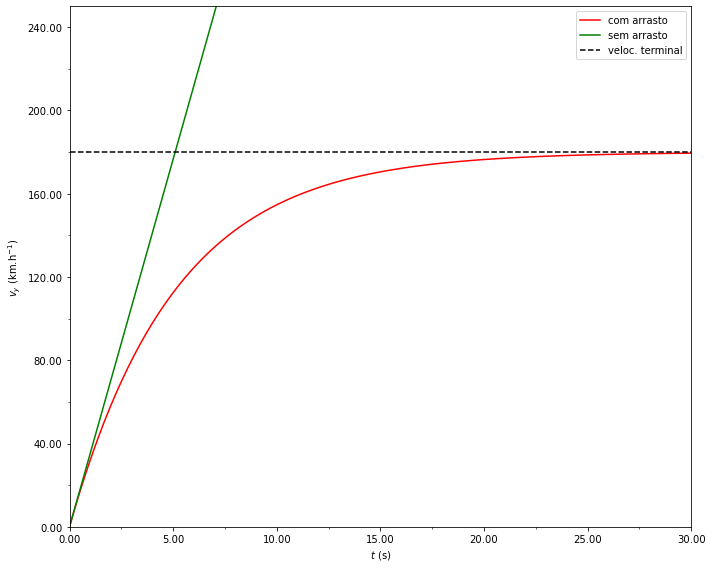

In [9]:
fig = plt.figure(figsize=(10, 8))
ax = plt.gca()

ax.plot(ttarr, vypc, color='red', linestyle='-', label='com arrasto')
ax.plot(ttarr, vyffpc, color='green', linestyle='-', label='sem arrasto')
ax.axhline(y=vyterm, color='black', linestyle ="--", label='veloc. terminal')

#limites, formatação dos ticks e label dos eixos
ax.set_xlim(0.0, 30.0)
ax.xaxis.set_major_locator(mtick.MultipleLocator(5.0))
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
ax.xaxis.set_minor_locator(mtick.MultipleLocator(2.5))
ax.set_xlabel('$t$ (s)')
ax.set_ylim(0.0, 250.0)
ax.yaxis.set_major_locator(mtick.MultipleLocator(40.0))
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
ax.yaxis.set_minor_locator(mtick.MultipleLocator(20.0))
ax.set_ylabel('$v_y$ (km.h$^{-1}$)')

ax.legend()
fig.tight_layout()
plt.show()